In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Trading2020 
 - This file does not seem to seperate oil vs non-oil exports as in sheet 1-1 compared to sheet 1.1 in Trading20
## Sheet 1-1
- Over all Exports & Imports weight & value from 2011 - 2020

In [2]:
Cleaned_Trading20= pd.read_csv('Cleaned_data/Trading2020_1-1_clean.csv')

In [4]:
Cleaned_Trading20.drop('Unnamed: 0', axis=1, inplace=True)

Added Difference in Weights & Difference in Value columns. (Exports - Imports)

In [5]:
Cleaned_Trading20

,Year,Imports Weight(1000 Tons),Imports Vaule(Millions SAR),Exports Weight(1000 Tons),Exports Vaule(Millions SAR),Difference in Weights,Difference in Value
0,2011,63161,493449,449823,1367620,386662,874171
1,2012,74493,583473,467012,1456502,392519,873029
2,2013,82881,630582,462339,1409523,379458,778941
3,2014,82536,651876,456962,1284122,374426,632246
4,2015,84206,655033,466243,763313,382037,108280
5,2016,76731,525636,500277,688423,423546,162787
6,2017,75998,504447,483767,831881,407769,327434
7,2018,75239,513993,509797,1103900,434558,589907
8,2019,77512,574361,492262,981012,414750,406651
9,2020,86137,517491,470531,651952,384394,134461


In [25]:
Cleaned_Trading20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Year                         10 non-null     int64
 1   Imports Weight(1000 Tons)    10 non-null     int64
 2   Imports Vaule(Millions SAR)  10 non-null     int64
 3   Exports Weight(1000 Tons)    10 non-null     int64
 4   Exports Vaule(Millions SAR)  10 non-null     int64
 5   Difference in Weights        10 non-null     int64
 6   Difference in Value          10 non-null     int64
dtypes: int64(7)
memory usage: 688.0 bytes


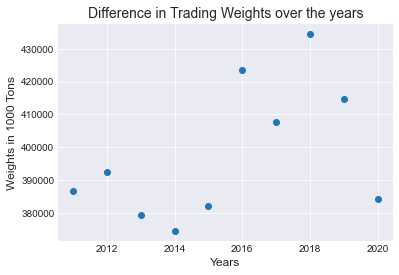

In [18]:
plt.style.use('seaborn-darkgrid')
plt.scatter(Cleaned_Trading20['Year'], Cleaned_Trading20['Difference in Weights'])
plt.xlabel('Years', fontsize= 12)
plt.ylabel('Weights in 1000 Tons', fontsize= 12)
plt.title('Difference in Trading Weights over the years', fontsize= 14)
plt.show()

This means that exports are much higher from 2016-2019. But this is oil and non-oil exports, is it the same if oil exports where excluded? 

### Compare statistics from trading20 excel sheet with the one above.

Difference in Trading Values over the years (including oil exports)

Text(0.5, 1.0, 'Difference in Trading Values over the years')

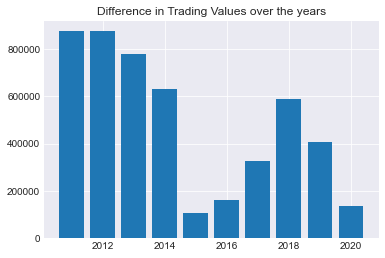

In [19]:
plt.bar(Cleaned_Trading20['Year'], Cleaned_Trading20['Difference in Value'])
plt.title('Difference in Trading Values over the years')

- We see that with oil exports, income from over all exports where much higher from 2011 - 2014 than other years. 
- This can be related to the increase of oil prices in that period compared to other years.

## Sheet 1-3
- Kind of materials & if imported/exported
- 2018 - 2020

In [21]:
TD_materials=pd.read_csv('Cleaned_data/Trading2020_1-3_clean.csv')

In [23]:
TD_materials.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
TD_materials

,2018 Weight(1000 Tons),2018 Value(Millions SAR),2019 Weight(1000 Tons),2019 Value(Millions SAR),2020 Weight(1000 Tons),2020 Value(Millions SAR),Kind of material,Import/Export
0,26661,26376,15299,19603,19426,22211,RAW MATERIAL,Imports
1,25868,123648,35094,127428,36109,124171,SEMI FINISHED PRODUCTS,Imports
2,22711,363968,27119,427330,30603,371109,FINISHED PRODUCTS,Imports
3,371803,722108,357130,639256,342440,387861,RAW MATERIAL,Exports
4,63030,183069,67896,167011,69502,148533,SEMI FINISHED PRODUCTS,Exports
5,74965,198724,67236,174745,58589,115558,FINISHED PRODUCTS,Exports


## Imports Stats from 2018-2020

In [29]:
grouped_Im = TD_materials.groupby('Import/Export')
Imports_18_20 = grouped_Im.get_group('Imports')
Imports_18_20

,2018 Weight(1000 Tons),2018 Value(Millions SAR),2019 Weight(1000 Tons),2019 Value(Millions SAR),2020 Weight(1000 Tons),2020 Value(Millions SAR),Kind of material,Import/Export
0,26661,26376,15299,19603,19426,22211,RAW MATERIAL,Imports
1,25868,123648,35094,127428,36109,124171,SEMI FINISHED PRODUCTS,Imports
2,22711,363968,27119,427330,30603,371109,FINISHED PRODUCTS,Imports


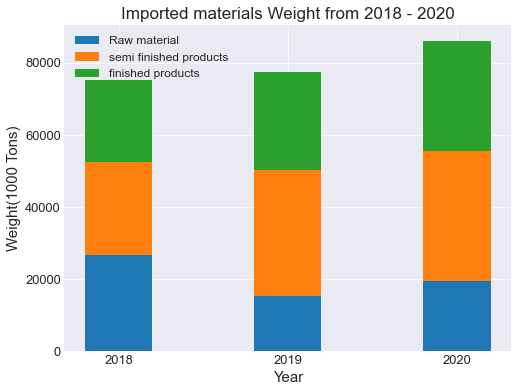

In [73]:
x = ['2018', '2019', '2020']
Raw = Imports_18_20[['2018 Weight(1000 Tons)','2019 Weight(1000 Tons)', '2020 Weight(1000 Tons)']].values[0]
Semi= Imports_18_20[['2018 Weight(1000 Tons)','2019 Weight(1000 Tons)', '2020 Weight(1000 Tons)']].values[1]
Finished=Imports_18_20[['2018 Weight(1000 Tons)','2019 Weight(1000 Tons)', '2020 Weight(1000 Tons)']].values[2]
raw_semi = list(np.add(Raw,Semi))
plt.figure(figsize = [8, 6])
plt.bar(x, Raw, 0.4, label= 'Raw material')
plt.bar(x, Semi, 0.4, bottom= Raw, label= 'semi finished products')
plt.bar(x, Finished, 0.4, bottom= raw_semi, label= 'finished products')
plt.title('Imported materials Weight from 2018 - 2020', fontsize= 17)
plt.xlabel('Year',fontsize= 15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.ylabel('Weight(1000 Tons)', fontsize= 15)
plt.legend(loc= 'upper left', fontsize= 12)
plt.show()

## Exports Stats from 2018-2020

In [63]:
grouped_Ex = TD_materials.groupby('Import/Export')
Exports_18_20 = grouped_Ex.get_group('Exports')
Exports_18_20

,2018 Weight(1000 Tons),2018 Value(Millions SAR),2019 Weight(1000 Tons),2019 Value(Millions SAR),2020 Weight(1000 Tons),2020 Value(Millions SAR),Kind of material,Import/Export
3,371803,722108,357130,639256,342440,387861,RAW MATERIAL,Exports
4,63030,183069,67896,167011,69502,148533,SEMI FINISHED PRODUCTS,Exports
5,74965,198724,67236,174745,58589,115558,FINISHED PRODUCTS,Exports


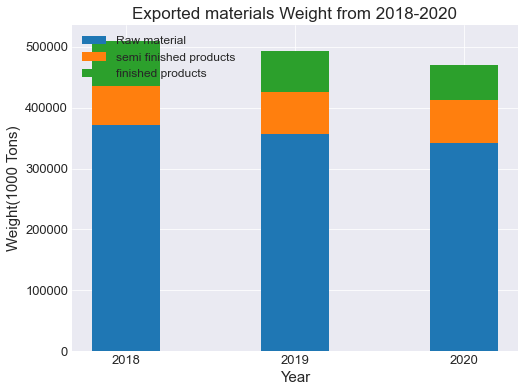

In [74]:
x = ['2018', '2019', '2020']
Raw = Exports_18_20[['2018 Weight(1000 Tons)','2019 Weight(1000 Tons)', '2020 Weight(1000 Tons)']].values[0]
Semi= Exports_18_20[['2018 Weight(1000 Tons)','2019 Weight(1000 Tons)', '2020 Weight(1000 Tons)']].values[1]
Finished=Exports_18_20[['2018 Weight(1000 Tons)','2019 Weight(1000 Tons)', '2020 Weight(1000 Tons)']].values[2]
raw_semi = list(np.add(Raw,Semi))
plt.figure(figsize = [8, 6])
plt.title('Exported materials Weight from 2018-2020', fontsize= 17)
plt.bar(x, Raw, 0.4, label= 'Raw material')
plt.bar(x, Semi, 0.4, bottom= Raw, label= 'semi finished products')
plt.bar(x, Finished, 0.4, bottom= raw_semi, label= 'finished products')
plt.xlabel('Year',fontsize= 15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.ylabel('Weight(1000 Tons)', fontsize= 15)
plt.legend(loc= 'upper left', fontsize= 12)
plt.show()

## Hint: Exports include oil

## Sheet 1.2 from Trading20 excel sheet

In [92]:
Exports_bysection= pd.read_csv('Cleaned_data/Trading20_1-2_clean.csv')

In [94]:
Exports_bysection.drop('Unnamed: 0', axis=1, inplace=True)

In [95]:
Exports_bysection

,2018 Value(millions in SAR),2019 Value(millions in SAR),2020 Value(millions in SAR),Section Description,Section Number
0,6057.512578,5687.233568,5368.675468,Live animals; animal products,1
1,1440.949608,1563.584641,1634.052079,Vegetable products,2
2,819.818876,849.966497,861.608808,Animal or vegetable fats and oils and their cl...,3
3,5470.373403,5782.133899,5846.126337,"Prepared foodstuffs; beverages, spirits and vi...",4
4,872029.853072,754960.758584,451092.776040,Mineral products,5
5,75455.289785,69551.508281,57873.453738,Products of the chemical or allied industries,6
6,79667.031342,72833.580298,62728.867805,Plastics and articles thereof; rubber and arti...,7
7,270.407456,280.720176,169.362314,"Raw hides and skins, leather, furskins and art...",8
8,311.069498,364.556581,253.464176,Wood and articles of wood; wood charcoal; cork...,9
9,2777.208284,2556.065300,2482.395784,Pulp of wood or of other fibrous cellulosic ma...,10


In [98]:
Exports_bysection[['2018 Value(millions in SAR)', '2019 Value(millions in SAR)', '2020 Value(millions in SAR)']].sum()

2018 Value(millions in SAR)    1.103900e+06
2019 Value(millions in SAR)    9.810124e+05
2020 Value(millions in SAR)    6.519520e+05
dtype: float64

In [96]:
Exports_bysection[['2018 Value(millions in SAR)', '2019 Value(millions in SAR)', '2020 Value(millions in SAR)']].max()

2018 Value(millions in SAR)    872029.853072
2019 Value(millions in SAR)    754960.758584
2020 Value(millions in SAR)    451092.776040
dtype: float64

In [99]:
Exports_bysection[['2018 Value(millions in SAR)', '2019 Value(millions in SAR)', '2020 Value(millions in SAR)']].mean()

2018 Value(millions in SAR)    52566.689809
2019 Value(millions in SAR)    46714.874444
2020 Value(millions in SAR)    31045.331556
dtype: float64

In [97]:
Exports_bysection[['2018 Value(millions in SAR)', '2019 Value(millions in SAR)', '2020 Value(millions in SAR)']].min()

2018 Value(millions in SAR)    80.914109
2019 Value(millions in SAR)    81.256700
2020 Value(millions in SAR)    51.349993
dtype: float64

In [76]:
Imports_byTransoprtType = pd.read_csv('Cleaned_data/Trading2020_1-5_clean.csv')

In [78]:
Imports_byTransoprtType.drop('Unnamed: 0', axis=1, inplace=True)

In [79]:
Imports_byTransoprtType

,Weight (1000 Tons) 2018,2018 Value (millions in SAR),2019 Weight (1000 Tons),2019 Value (millions in SAR),2020 Weight (1000 Tons),2020 Value (millions in SAR),Importing Type
0,66260.247914,310406.535978,66366.941453,352081.497419,75821.060302,320312.112449,Imports By Sea
1,8343.995809,76875.211899,10386.983890,83588.749138,9619.117143,75991.218771,Imports By Land
2,634.929403,126710.942322,757.717624,138691.208044,697.093139,121187.257807,Imports By Air


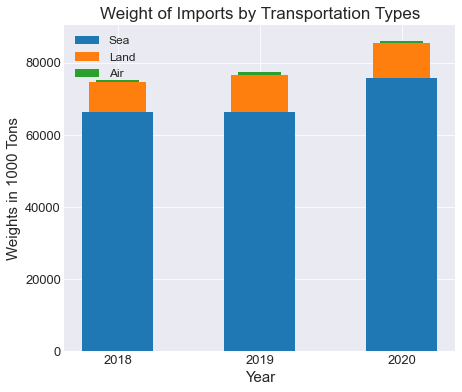

In [80]:
x = ['2018', '2019', '2020']
sea = Imports_byTransoprtType[["Weight (1000 Tons) 2018", "2019 Weight (1000 Tons)", "2020 Weight (1000 Tons)"]].values[0]
land = Imports_byTransoprtType[["Weight (1000 Tons) 2018", "2019 Weight (1000 Tons)", "2020 Weight (1000 Tons)"]].values[1]
air = Imports_byTransoprtType[["Weight (1000 Tons) 2018", "2019 Weight (1000 Tons)", "2020 Weight (1000 Tons)"]].values[2]
sea_land = list(np.add(sea,land))
plt.figure(figsize = [7,6])
plt.bar(x, sea, 0.5, label= 'Sea')
plt.bar(x, land, 0.4, bottom= sea, label= 'Land')
plt.bar(x,air, 0.3, bottom= sea_land, label= 'Air')
plt.title('Weight of Imports by Transportation Types', fontsize= 17)
plt.xlabel('Year',fontsize= 15)
plt.ylabel('Weights in 1000 Tons', fontsize= 15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.legend(loc= 'upper left', fontsize= 12)
plt.show()

## Sheet 2-1

- Top 50 Import Commodities by value with 3 Major Trading Countries
- Values & Weights
- 2020 only

## Sheet 3-7
- 

In [81]:
Exports_commodityGroup = pd.read_csv('Cleaned_data/Trading2020_3-7_clean.csv')

In [84]:
Exports_commodityGroup.drop('Unnamed: 0', axis=1, inplace= True)

In [85]:
Exports_commodityGroup

,Quantity/Units,Weight(Tons),Value(1000 SAR),Commodity Code,Commodity,Country Group
0,0,15765.183,241949.257,2071100,"MEAT, CONS. BWLS & EXTREM. OF TURKEY/CHICKEN:G...",Gulf Cooperation Council
1,0,290987.699,740453.872,4029110,"OTHER MILK, UNSWEETENED",Gulf Cooperation Council
2,0,83779.822,390287.427,4031000,YOGURT,Gulf Cooperation Council
3,0,22805.576,414107.638,4063000,"PROCESSED CHEESE, NOT GRATED OR POWDERED",Gulf Cooperation Council
4,0,45952.563,189859.825,8041021,STORED DATES,Gulf Cooperation Council
...,...,...,...,...,...,...
512,0,247.500,820.418,39021000,POLYPRO PYLENE,Not Defined
513,0,247.500,877.412,39023000,PROPYLENE COPOLYMERS,Not Defined
514,0,1.956,4210.834,84119900,OTHER PARTS FOR TURBO-JETS OR TURBO-PROPELLERS,Not Defined
515,0,77.327,2789.056,84249090,OTHER PARTS OF MECHANICAL APPLIANCES FOR PRAJE...,Not Defined


### Trading20
## Sheet 1.1

In [86]:
Trading_Oil_non_Oil= pd.read_csv('Cleaned_data/Trading20_1-1_clean.csv')

In [88]:
Trading_Oil_non_Oil.drop('Unnamed: 0', axis=1, inplace=True)

In [89]:
Trading_Oil_non_Oil

,Year,Oil Exports Value(Millions SAR),Oil Percentage of Total Exports,Non-oil Exports Value(millions SAR),Non-oil Percentage of Total Exports
0,2011,1.191052e+06,87.089414,176567.731649,12.910586
1,2012,1.265551e+06,86.889717,190951.553513,13.110283
2,2013,1.207080e+06,85.637470,202443.212959,14.362530
3,2014,1.067092e+06,83.098959,217029.903583,16.901041
4,2015,5.734120e+05,75.121469,189901.077563,24.878531
5,2016,5.107295e+05,74.188322,177693.532214,25.811678
6,2017,6.384023e+05,76.741993,193479.004472,23.258007
7,2018,8.684424e+05,78.670352,235458.083665,21.329648
8,2019,7.518281e+05,76.637987,229184.234637,23.362013
9,2020,4.475992e+05,68.655246,204352.737425,31.344754


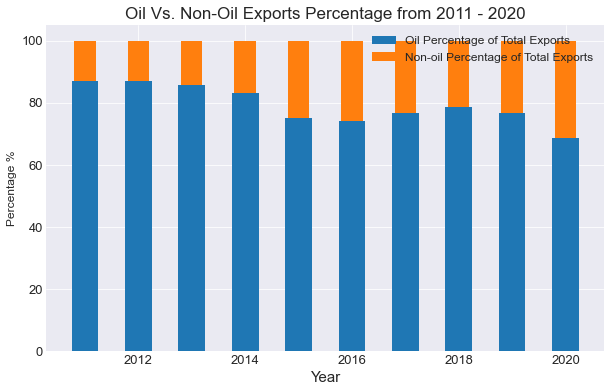

In [90]:
x= Trading_Oil_non_Oil['Year']
y= Trading_Oil_non_Oil['Oil Percentage of Total Exports']
z= Trading_Oil_non_Oil['Non-oil Percentage of Total Exports']
plt.figure(figsize = [10,6])
plt.bar(x, y, 0.5, label= 'Oil Percentage of Total Exports')
plt.bar(x, z, 0.4, bottom= y, label= 'Non-oil Percentage of Total Exports')
plt.title('Oil Vs. Non-Oil Exports Percentage from 2011 - 2020', fontsize= 17)
plt.xlabel('Year',fontsize= 15)
plt.xticks(fontsize= 13)
plt.yticks(fontsize= 13)
plt.ylabel('Percentage %', fontsize= 12)
plt.legend(loc= 'best', fontsize= 12)
plt.show()

## Sheet 2.1
Imports by section 2018-2020. Only values, no weights

In [100]:
Imports_bysection= pd.read_csv("Cleaned_data/Trading20_2-1_clean.csv")

In [101]:
Imports_bysection.drop('Unnamed: 0', axis=1, inplace=True)

In [102]:
Imports_bysection

,2018 Value(millions in SAR),2019 Value(millions in SAR),2020 Value(millions in SAR),Section Description,Section Number
0,18095.450548,19507.619134,19013.048509,Live animals; animal products,1
1,32996.027181,31123.980544,34922.104079,Vegetable products,2
2,3521.849209,3338.453922,3363.130944,Animal or vegetable fats and oils and their cl...,3
3,25635.233829,27399.318015,28417.779143,"Prepared foodstuffs; beverages, spirits and vi...",4
4,21090.437514,18021.236913,18612.873864,Mineral products,5
5,51715.771619,53854.494181,53404.397121,Products of the chemical or allied industries,6
6,17486.718316,20567.953322,19462.287220,Plastics and articles thereof; rubber and arti...,7
7,1872.681936,2295.584415,1650.055971,"Raw hides and skins, leather, furskins and art...",8
8,4271.516713,4750.736646,5169.182124,Wood and articles of wood; wood charcoal; cork...,9
9,7260.801908,7150.673740,6547.644869,Pulp of wood or of other fibrous cellulosic ma...,10
